In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

ROOT_DIR = os.path.dirname(os.path.abspath(""))

file = os.path.join(ROOT_DIR, "data/sitges_access.csv")
df = pd.read_csv(file)
df.head()

,Unnamed: 0,server_name,IP,logname,authenticate,date,petition,URL,status,bytes,referer,user-agent,level
0,0,sitgesanytime.com,47.76.35.19,-,-,2024-01-22 00:00:00+01:00,HEAD,/fr/pag492/explora-platges-i-ports-2/id12/les-...,301,4840,-,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0
1,1,www.sitgesanytime.com,47.76.35.19,-,-,2024-01-22 00:00:01+01:00,HEAD,/fr/pag492/explora-platges-i-ports-2/id12/les-...,200,5223,-,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0
2,2,www.sitgesanytime.com,40.77.167.53,-,-,2024-01-22 00:00:06+01:00,GET,/ca/noticias/84/sitges-obt%C3%A9-el-certificat...,404,2509,-,"Mozilla/5.0 AppleWebKit/537.36 (KHTML, like Ge...",5
3,3,sitgesanytime.com,47.76.35.19,-,-,2024-01-22 00:00:06+01:00,HEAD,/fr/pag492/explora-platges-i-ports-2/id12/les-...,301,4840,-,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,0
4,4,www.sitgesanytime.com,47.76.35.19,-,-,2024-01-22 00:00:07+01:00,HEAD,/fr/pag492/explora-platges-i-ports-2/id12/les-...,200,5260,-,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,0


In [2]:
df_clean = df.copy()

In [3]:
# shuffle the rows
df_clean = df_clean.sample(frac=1, random_state=42).reset_index(drop=True)
df_clean.head()

,Unnamed: 0,server_name,IP,logname,authenticate,date,petition,URL,status,bytes,referer,user-agent,level
0,111926,www.sitgesanytime.com,86.4.35.245,-,-,2024-01-23 19:14:34+01:00,GET,/plantilles/turisme/js/responsivemenu.js?v=3 H...,200,1913,https://www.sitgesanytime.com/en/pl409/blog/id...,Mozilla/5.0 (iPhone; CPU iPhone OS 17_2_1 like...,0
1,119842,www.sitgesanytime.com,168.119.65.47,-,-,2024-01-26 20:22:25+01:00,GET,/plantilles/turisme/css/estils-mw800.css?v=11 ...,200,3914,https://www.sitgesanytime.com/es/planifica-el-...,Mozilla/5.0 (compatible; AhrefsBot/7.0; +http:...,0
2,56123,www.sitgesanytime.com,64.124.8.65,-,-,2024-01-23 10:59:54+01:00,GET,/ca/pl349/actualitat/noticies/id189/l-exposici...,200,13883,-,Mozilla/5.0 (compatible; ImagesiftBot; +images...,0
3,6249,www.sitgesanytime.com,216.244.66.199,-,-,2024-01-26 01:08:45+01:00,GET,/ca/noticias/20/la-gay-pride-reivindica-els-dr...,404,7269,-,Mozilla/5.0 (compatible; DotBot/1.2; +https://...,10
4,31977,www.sitgesanytime.com,168.119.65.45,-,-,2024-01-24 06:47:46+01:00,GET,/plantilles/turisme/css/estils-mw500.css?v=14 ...,200,1233,https://www.sitgesanytime.com/fr/pl50/planifie...,Mozilla/5.0 (compatible; AhrefsBot/7.0; +http:...,0


### Drop useless columns

In [4]:
# remove columns
df_clean = df_clean.drop(columns=["logname", "authenticate", "Unnamed: 0", "server_name"])
df_clean.columns

Index(['IP', 'date', 'petition', 'URL', 'status', 'bytes', 'referer',
       'user-agent', 'level'],
      dtype='object')

### IP

223


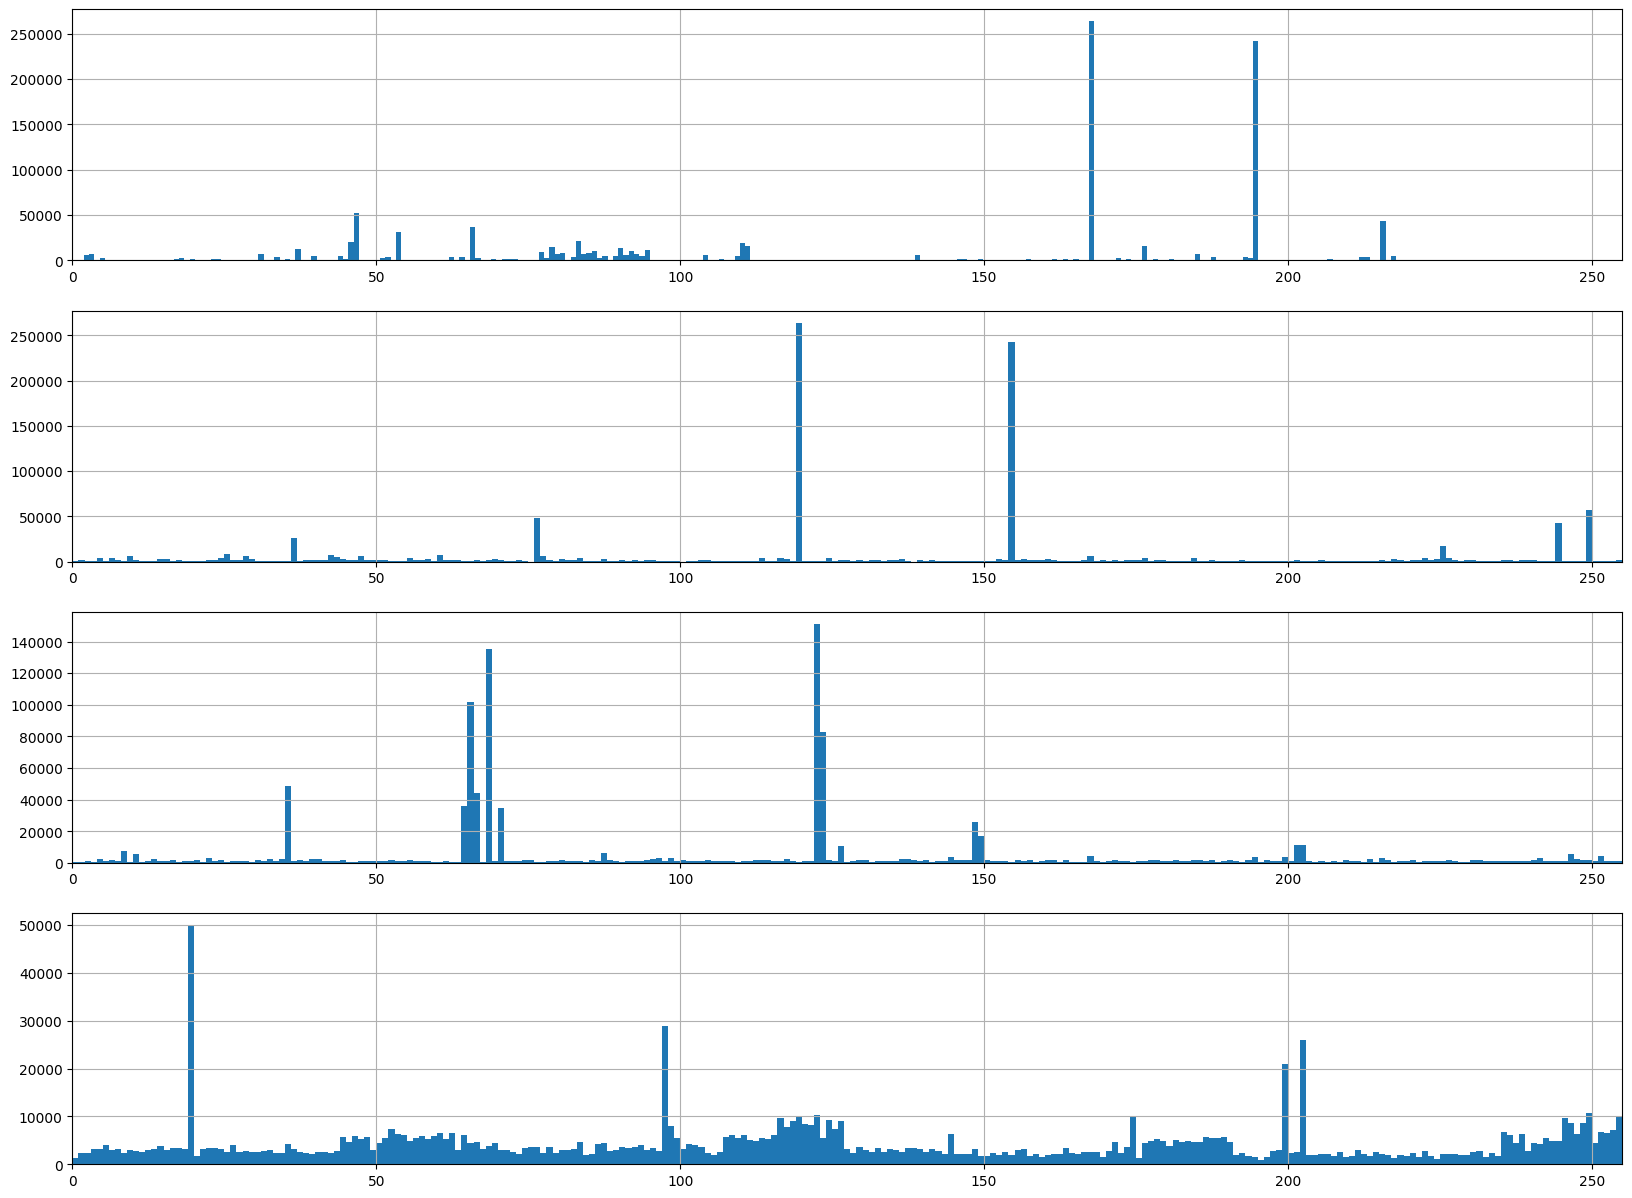

In [5]:
fig, ax = plt.subplots(4, 1, figsize=(20, 15))
for i in range(4):
	df_clean["IP"].apply(lambda x: int(x.split(".")[i])).hist(bins=255, ax=ax[i])
	ax[i].set_xlim([0, 255])
print(df_clean["IP"].apply(lambda x: int(x.split(".")[0])).max())
plt.show()

In [6]:
df_temp = df_clean.copy()
IP_octs = df_clean["IP"].apply(lambda x: x.split("."))
for i in range(4):
	df_temp["IP_oct" + str(i)] = IP_octs.apply(lambda x: float(x[i]) / 255.0)
df_temp = df_temp.drop(columns=["IP"])
df_clean = df_temp.copy()
df_clean.head()

,date,petition,URL,status,bytes,referer,user-agent,level,IP_oct0,IP_oct1,IP_oct2,IP_oct3
0,2024-01-23 19:14:34+01:00,GET,/plantilles/turisme/js/responsivemenu.js?v=3 H...,200,1913,https://www.sitgesanytime.com/en/pl409/blog/id...,Mozilla/5.0 (iPhone; CPU iPhone OS 17_2_1 like...,0,0.337255,0.015686,0.137255,0.960784
1,2024-01-26 20:22:25+01:00,GET,/plantilles/turisme/css/estils-mw800.css?v=11 ...,200,3914,https://www.sitgesanytime.com/es/planifica-el-...,Mozilla/5.0 (compatible; AhrefsBot/7.0; +http:...,0,0.658824,0.466667,0.254902,0.184314
2,2024-01-23 10:59:54+01:00,GET,/ca/pl349/actualitat/noticies/id189/l-exposici...,200,13883,-,Mozilla/5.0 (compatible; ImagesiftBot; +images...,0,0.250980,0.486275,0.031373,0.254902
3,2024-01-26 01:08:45+01:00,GET,/ca/noticias/20/la-gay-pride-reivindica-els-dr...,404,7269,-,Mozilla/5.0 (compatible; DotBot/1.2; +https://...,10,0.847059,0.956863,0.258824,0.780392
4,2024-01-24 06:47:46+01:00,GET,/plantilles/turisme/css/estils-mw500.css?v=14 ...,200,1233,https://www.sitgesanytime.com/fr/pl50/planifie...,Mozilla/5.0 (compatible; AhrefsBot/7.0; +http:...,0,0.658824,0.466667,0.254902,0.176471


### Date

In [7]:
df_clean["date"] = df["date"].str.split("+").str[0]
df_clean["date"].head()

0    2024-01-22 00:00:00
1    2024-01-22 00:00:01
2    2024-01-22 00:00:06
3    2024-01-22 00:00:06
4    2024-01-22 00:00:07
Name: date, dtype: object

In [8]:
def sin_transform(x, period=24):
	return np.sin(2 * np.pi * x / period)

def cos_transform(x, period=24):
	return np.cos(2 * np.pi * x / period)

df_temp = df_clean.copy()

In [9]:
df_temp["date"] = pd.to_datetime(df_temp["date"])
df_temp["month"] = df_temp["date"].dt.month
df_temp["day"] = df_temp["date"].dt.day
df_temp["weekday"] = df_temp["date"].dt.weekday
df_temp["hour"] = df_temp["date"].dt.hour
df_temp["minute"] = df_temp["date"].dt.minute

In [10]:
df_temp["month_sin"] = sin_transform(df_temp["month"], 12)
df_temp["month_cos"] = cos_transform(df_temp["month"], 12)
df_temp["day_sin"] = sin_transform(df_temp["day"], 31)
df_temp["day_cos"] = cos_transform(df_temp["day"], 31)
df_temp["weekday_sin"] = sin_transform(df_temp["weekday"], 7)
df_temp["weekday_cos"] = cos_transform(df_temp["weekday"], 7)
df_temp["hour_sin"] = sin_transform(df_temp["hour"], 24)
df_temp["hour_cos"] = cos_transform(df_temp["hour"], 24)
df_temp["minute_sin"] = sin_transform(df_temp["minute"], 60)
df_temp["minute_cos"] = cos_transform(df_temp["minute"], 60)

df_temp.drop(["date", 'month', 'day', 'weekday', 'hour', 'minute'], axis=1, inplace=True)

In [11]:
df_clean = df_temp.copy()
df_clean.sample(frac=1, random_state=42).reset_index(drop=True).head()

,petition,URL,status,bytes,referer,user-agent,level,IP_oct0,IP_oct1,IP_oct2,...,month_sin,month_cos,day_sin,day_cos,weekday_sin,weekday_cos,hour_sin,hour_cos,minute_sin,minute_cos
0,GET,/comu/fancybox/jquery.fancybox.css?v=2.1.7 HTT...,200,1512,https://www.sitgesanytime.com/es/pl409/blog/id...,Mozilla/5.0 (compatible; AhrefsBot/7.0; +http:...,0,0.658824,0.466667,0.254902,...,0.5,0.866025,-0.998717,-0.050649,0.781831,0.623490,-0.965926,2.588190e-01,0.994522,0.104528
1,GET,/comu/fancybox/helpers/jquery.fancybox-buttons...,200,744,https://www.sitgesanytime.com/es/pl349/actuali...,Mozilla/5.0 (compatible; AhrefsBot/7.0; +http:...,0,0.764706,0.603922,0.478431,...,0.5,0.866025,-0.848644,0.528964,-0.433884,-0.900969,-0.866025,5.000000e-01,0.743145,-0.669131
2,GET,/comu/js/iban.js HTTP/1.1,200,8947,https://www.sitgesanytime.com/es/actualidad/no...,"Mozilla/5.0 AppleWebKit/537.36 (KHTML, like Ge...",0,0.258824,0.976471,0.274510,...,0.5,0.866025,-0.998717,-0.050649,0.781831,0.623490,0.500000,-8.660254e-01,-0.104528,0.994522
3,GET,/plantilles/turisme/js/bgvideo.js HTTP/2.0,200,5210,https://www.sitgesanytime.com/en/what-to-do/pl...,Mozilla/5.0 (compatible; AhrefsBot/7.0; +http:...,0,0.658824,0.466667,0.266667,...,0.5,0.866025,-0.848644,0.528964,-0.433884,-0.900969,0.258819,9.659258e-01,0.743145,0.669131
4,GET,/plantilles/turisme/img/ico-arrow-down.gif HTT...,200,1329,https://www.sitgesanytime.com/de/pl355/entdeck...,Mozilla/5.0 (iPhone; CPU iPhone OS 16_6 like M...,0,0.309804,0.611765,0.843137,...,0.5,0.866025,-0.988468,0.151428,0.974928,-0.222521,1.000000,6.123234e-17,-0.978148,0.207912


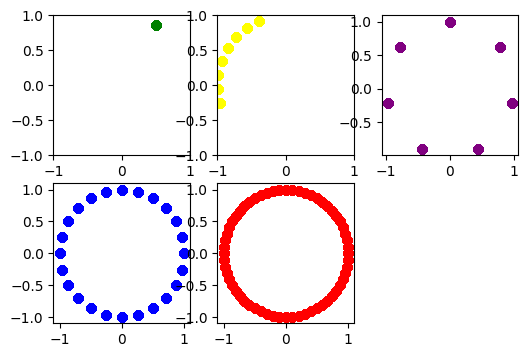

In [12]:
plt.figure(figsize=(3*2, 2*2))
sample_df = df_clean.sample(10000, random_state=42).reset_index(drop=True)
plt.subplot(2, 3, 1)
plt.scatter(sample_df["month_sin"], sample_df["month_cos"], color="green")
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.subplot(2, 3, 2)
plt.scatter(sample_df["day_sin"], sample_df["day_cos"], color="yellow")
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.subplot(2, 3, 3)
plt.scatter(sample_df["weekday_sin"], sample_df["weekday_cos"], color="purple")
plt.subplot(2, 3, 4)
plt.scatter(sample_df["hour_sin"], sample_df["hour_cos"], color="blue")
plt.subplot(2, 3, 5)
plt.scatter(sample_df["minute_sin"], sample_df["minute_cos"], color="red")

plt.show()

### Petition

In [13]:
df_clean["petition"].value_counts()

petition
GET        1024862
POST         27258
HEAD         24800
-              436
CONNECT         29
OPTIONS          7
USER             1
Name: count, dtype: int64

In [14]:
df_clean = pd.get_dummies(df_clean, columns=["petition"])
columns_to_combine = ["petition_CONNECT", "petition_OPTIONS", "petition_USER"]
df_clean["petition_other"] = df_clean[columns_to_combine].max(axis=1) # combine using OR
df_clean = df_clean.drop(columns=columns_to_combine)
print(df_clean["petition_other"].value_counts())
df_clean.head()

petition_other
False    1077356
True          37
Name: count, dtype: int64


,URL,status,bytes,referer,user-agent,level,IP_oct0,IP_oct1,IP_oct2,IP_oct3,...,weekday_cos,hour_sin,hour_cos,minute_sin,minute_cos,petition_-,petition_GET,petition_HEAD,petition_POST,petition_other
0,/plantilles/turisme/js/responsivemenu.js?v=3 H...,200,1913,https://www.sitgesanytime.com/en/pl409/blog/id...,Mozilla/5.0 (iPhone; CPU iPhone OS 17_2_1 like...,0,0.337255,0.015686,0.137255,0.960784,...,1.0,0.0,1.0,0.0,1.0,False,True,False,False,False
1,/plantilles/turisme/css/estils-mw800.css?v=11 ...,200,3914,https://www.sitgesanytime.com/es/planifica-el-...,Mozilla/5.0 (compatible; AhrefsBot/7.0; +http:...,0,0.658824,0.466667,0.254902,0.184314,...,1.0,0.0,1.0,0.0,1.0,False,True,False,False,False
2,/ca/pl349/actualitat/noticies/id189/l-exposici...,200,13883,-,Mozilla/5.0 (compatible; ImagesiftBot; +images...,0,0.250980,0.486275,0.031373,0.254902,...,1.0,0.0,1.0,0.0,1.0,False,True,False,False,False
3,/ca/noticias/20/la-gay-pride-reivindica-els-dr...,404,7269,-,Mozilla/5.0 (compatible; DotBot/1.2; +https://...,10,0.847059,0.956863,0.258824,0.780392,...,1.0,0.0,1.0,0.0,1.0,False,True,False,False,False
4,/plantilles/turisme/css/estils-mw500.css?v=14 ...,200,1233,https://www.sitgesanytime.com/fr/pl50/planifie...,Mozilla/5.0 (compatible; AhrefsBot/7.0; +http:...,0,0.658824,0.466667,0.254902,0.176471,...,1.0,0.0,1.0,0.0,1.0,False,True,False,False,False


### URL

In [23]:
df_temp = df_clean.copy()
df_temp["URL"].str.contains(r"HTTP/\d+\.\d+").value_counts()

URL
True     1076959
False        432
Name: count, dtype: int64

In [24]:
df_temp = df_temp[df_temp["URL"].str.contains(r"HTTP/\d+\.\d+").fillna(False)]

In [6]:
from skipgram import *

embeddings = load_embeddings(os.path.join(ROOT_DIR, "models/embeddings-url.pt"))
idx2word = load_idx2word(os.path.join(ROOT_DIR, "models/idx2word-url.json"))
tokenizer = load_tokenizer(os.path.join(ROOT_DIR, "models"), "charbpe-url")
embeddings.shape

torch.Size([923, 30])

In [29]:
# --- example of how to get the embeddings of the urls ---
# --- running might take ~1:30 min and 3.3 GB ---
# urls_embeddings = []
# word2idx = {word: idx for idx, word in idx2word.items()}
# for url in tqdm(df_temp["URL"]):
# 	tokens = tokenizer.encode(url).tokens
# 	tokens_idx = get_idx(tokens, word2idx)
# 	url_embedding = embeddings[tokens_idx]
# 	urls_embeddings.append(url_embedding.to(torch.float32))

100%|██████████| 1076959/1076959 [01:32<00:00, 11655.34it/s]


In [ ]:
df_clean = df_temp.copy()

### Status

In [38]:
df_temp = df_clean.copy()
df_temp["status"] = df_temp["status"].apply(lambda x: str(x)[0])
df_temp["status_1"] = False
df_temp = pd.get_dummies(df_temp, columns=["status"])
df_clean = df_temp.copy()
df_clean.head()

,server_name,date,URL,bytes,referer,user-agent,level,IP_oct0,IP_oct1,IP_oct2,...,petition_-,petition_GET,petition_HEAD,petition_POST,petition_other,status_1,status_2,status_3,status_4,status_5
0,www.sitgesanytime.com,2024-01-22 00:00:00,/plantilles/turisme/js/responsivemenu.js?v=3 H...,1913,https://www.sitgesanytime.com/en/pl409/blog/id...,Mozilla/5.0 (iPhone; CPU iPhone OS 17_2_1 like...,0,0.337255,0.015686,0.137255,...,False,True,False,False,False,False,True,False,False,False
1,www.sitgesanytime.com,2024-01-22 00:00:01,/plantilles/turisme/css/estils-mw800.css?v=11 ...,3914,https://www.sitgesanytime.com/es/planifica-el-...,Mozilla/5.0 (compatible; AhrefsBot/7.0; +http:...,0,0.658824,0.466667,0.254902,...,False,True,False,False,False,False,True,False,False,False
2,www.sitgesanytime.com,2024-01-22 00:00:06,/ca/pl349/actualitat/noticies/id189/l-exposici...,13883,-,Mozilla/5.0 (compatible; ImagesiftBot; +images...,0,0.250980,0.486275,0.031373,...,False,True,False,False,False,False,True,False,False,False
3,www.sitgesanytime.com,2024-01-22 00:00:06,/ca/noticias/20/la-gay-pride-reivindica-els-dr...,7269,-,Mozilla/5.0 (compatible; DotBot/1.2; +https://...,10,0.847059,0.956863,0.258824,...,False,True,False,False,False,False,False,False,True,False
4,www.sitgesanytime.com,2024-01-22 00:00:07,/plantilles/turisme/css/estils-mw500.css?v=14 ...,1233,https://www.sitgesanytime.com/fr/pl50/planifie...,Mozilla/5.0 (compatible; AhrefsBot/7.0; +http:...,0,0.658824,0.466667,0.254902,...,False,True,False,False,False,False,True,False,False,False


### Bytes

<Axes: >

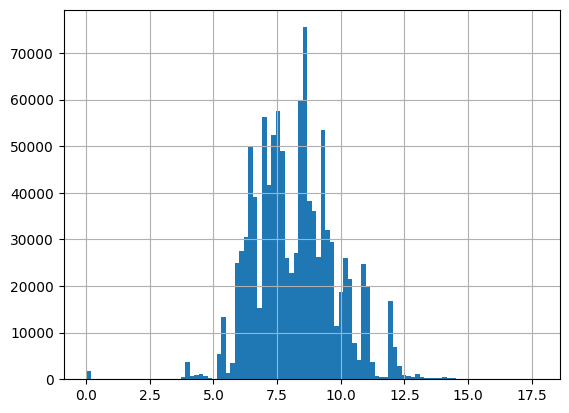

In [39]:
df_temp = df_clean.copy()
df_temp["bytes"] = np.log(df_temp["bytes"]+1)
df_temp["bytes"].hist(bins=100)

In [40]:
train_size, val_size, test_size = 0.6, 0.2, 0.2
partition1 = int(train_size*len(df_temp))
partition2 = int((train_size+val_size)*len(df_temp))
df_train = df_temp.loc[:partition1]
df_val = df_temp.loc[partition1:partition2]
df_test = df_temp.loc[partition2:]

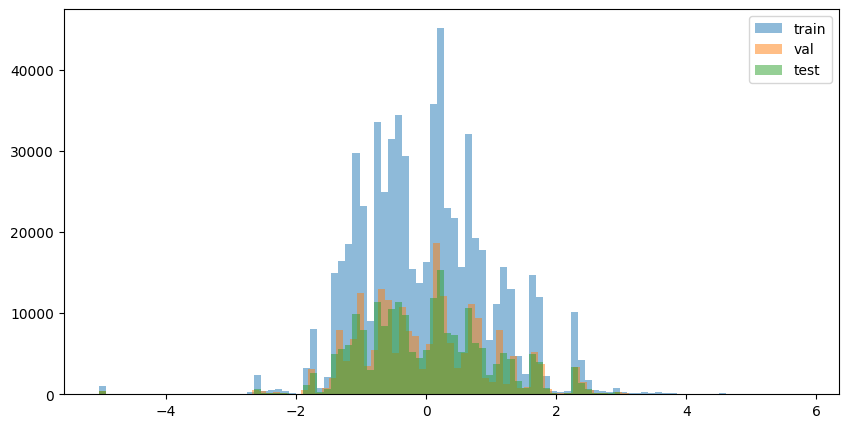

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_bytes_scaled = scaler.fit_transform(df_train["bytes"].to_numpy().reshape(-1, 1))
val_bytes_scaled = scaler.transform(df_val["bytes"].to_numpy().reshape(-1, 1))
test_bytes_scaled = scaler.transform(df_test["bytes"].to_numpy().reshape(-1, 1))
plt.figure(figsize=(10, 5))
plt.hist(train_bytes_scaled, bins=100, alpha=0.5, label="train")
plt.hist(val_bytes_scaled, bins=100, alpha=0.5, label="val")
plt.hist(test_bytes_scaled, bins=100, alpha=0.5, label="test")
plt.legend()
plt.show()

### Referer

### User agent